<a href="https://colab.research.google.com/github/udsey/DS_projets/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cvxpy
import numpy as np

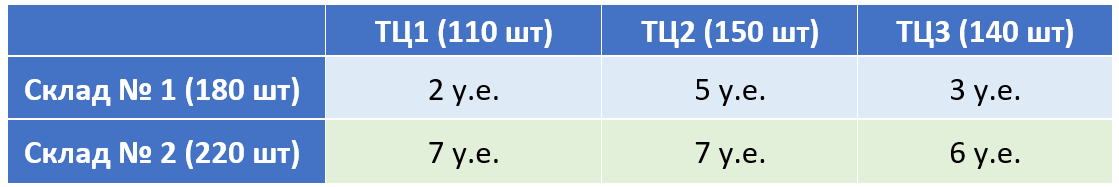


Составьте оптимальный план перевозок, со Склада № 1 и Склада № 2, в три торговых центра, с учётом тарифов, запасов и потребностей, которые указаны в таблице.

Сформулируйте задачу, как задачу линейного программирования, и решите её любым способом (желательно программным).

В ответ запишите минимальную суммарную стоимость поставки (с точностью до целых):




In [ ]:
cost = np.array([
                      [2, 5, 3],
                      [7, 7, 6]
])

mall_cap = np.array([110, 150, 140])
warehouse_cap = np.array([180, 220])

warehouse_1 = np.array([180])
warehouse_2 = np.array([220])



In [ ]:
x = cvxpy.Variable(shape=(2,3), integer = True)
total = cvxpy.sum(cvxpy.multiply(cost, x))

In [ ]:
constraint_1 = (cvxpy.sum(x, axis=0)==mall_cap)
constraint_2 = (cvxpy.sum(x, axis=1)==warehouse_cap)
constraint_3 = x>=0

In [ ]:
problem = cvxpy.Problem(cvxpy.Minimize(total), constraints=[constraint_1, constraint_2, constraint_3])

In [ ]:
problem.solve(solver='ECOS_BB')

1900.0000003967286

In [ ]:
x.value

array([[1.10000000e+02, 2.24550789e-07, 6.99999999e+01],
       [8.60888448e-08, 1.50000000e+02, 7.00000001e+01]])

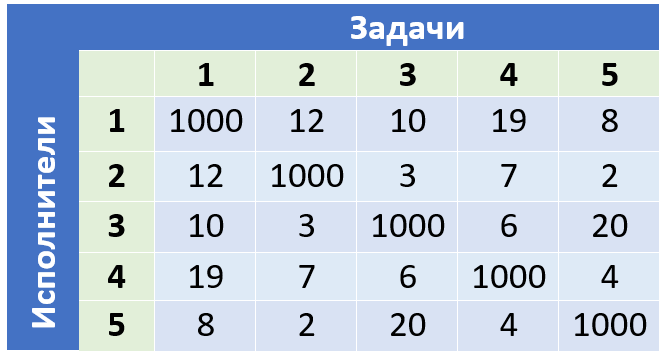

In [ ]:
tasks = np.array([1, 2, 3, 4, 5])
people = np.array([1, 2, 3, 4, 5])

cost = np.array([
                 [1000, 12, 10, 19, 8],
                 [12, 1000, 3, 7, 2],
                 [10, 3, 1000, 6, 20],
                 [19, 7, 6, 1000, 4],
                 [8, 2, 20, 4, 1000]
])

In [ ]:
x = cvxpy.Variable(shape=cost.shape, boolean = True)

In [ ]:
total_value = cvxpy.sum(cvxpy.multiply(cost, x))

In [ ]:
constraint_1 = (cvxpy.sum(x, axis=0)==np.ones(tasks.shape))
constraint_2 = (cvxpy.sum(x, axis=1)==np.ones(people.shape))
constraint_3 = x>=0

In [ ]:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint_1, constraint_2, constraint_3])

In [ ]:
problem.solve()

32.0

In [ ]:
x.value

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

Необходимо найти кратчайший маршрут из точки A, который проходит через все другие точки и возвращается в A.


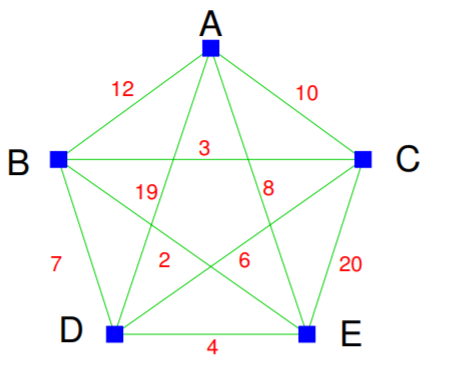


Сформулируйте эту задачу как задачу ЦЛП и решите её.

В ответ запишите длину кратчайшего пути.

In [ ]:
graph = np.array([
                  [0, 12, 10, 19, 8],
                  [12, 0, 3, 7, 2],
                  [10, 3, 0, 6, 20],
                  [19, 7, 6, 0, 4],
                  [8, 2, 20, 4, 0]
])

In [ ]:
x = cvxpy.Variable(shape=graph.shape, integer = True)

In [ ]:
constraint_1 = (cvxpy.sum(x, axis=0)==np.ones(graph.shape[0]))
constraint_2 = (cvxpy.sum(x, axis=1)==np.ones(graph.shape[1]))
constraint_3 = (x>=0)
constraint_4 = (x<=1)
constraint_5 = (cvxpy.diag(x) == np.zeros(graph.shape[0]))

In [ ]:
total_dist = cvxpy.sum(cvxpy.multiply(graph, x))

In [ ]:
problem = cvxpy.Problem(cvxpy.Minimize(total_dist),
                        constraints=[constraint_1, constraint_2, 
                                     constraint_3, constraint_4,
                                     constraint_5])

In [ ]:
problem.solve()

32.0

In [ ]:
x.value

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

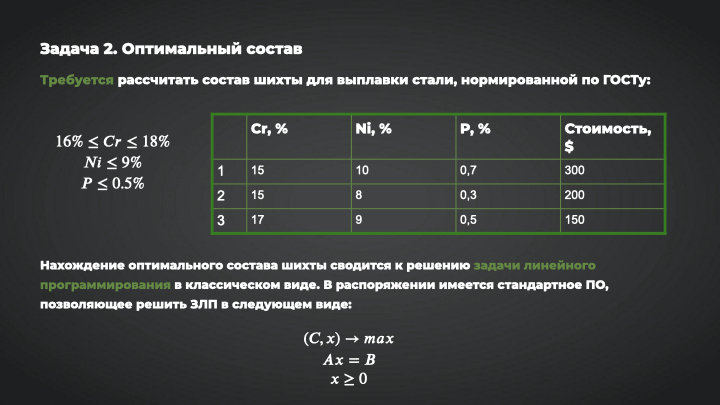

In [ ]:
compound = np.array([
                    [0.15, 0.15, 0.17],
                    [0.10, 0.8, 0.9],
                    [0.07, 0.03, 0.05]])
cost = np.array([300, 200, 150])

limitations = np.array([0.16, 0.18, 0.9, 0.05])

In [ ]:
x = cvxpy.Variable(shape=3, integer=True)

In [ ]:
total_value = x @ cost

In [ ]:
constraints = [compound[0, :] @ x >= limitations[0],
               compound[0, :] @ x <= limitations[1],
               compound[1, :] @ x <= limitations[2],
               compound[2, :] @ x <= limitations[3],
               x>=0]


In [ ]:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=constraints)

In [ ]:
problem.solve()

150.0

In [ ]:
np.rint(x.value)

array([0., 0., 1.])

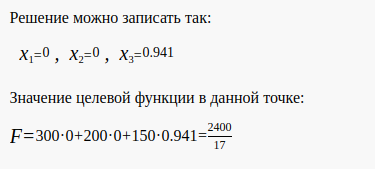

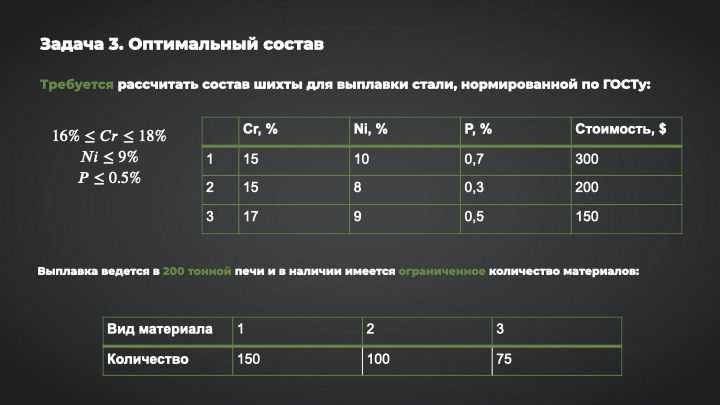

In [ ]:
compound = np.array([
                    [0.15, 0.15, 0.17],
                    [0.10, 0.8, 0.9],
                    [0.07, 0.03, 0.05]])
cost = np.array([300, 200, 150])

limitations_1 = np.array([0.16, 0.18, 0.9, 0.05])
limitations_2 = np.array([150, 100, 75])

In [ ]:
x = cvxpy.Variable(shape=3, integer=True)

In [ ]:
total_value = x @ cost

In [ ]:
constraints = [compound[0, :] @ x >= limitations_1[0],
               compound[0, :] @ x <= limitations_1[1],
               compound[1, :] @ x <= limitations_1[2],
               compound[2, :] @ x <= limitations_1[3],
               x <= limitations_2,
               sum(x) >= 300,
               x>=0]


In [ ]:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=constraints)

In [ ]:
problem.solve()

inf

In [ ]:
x.value

array([0., 0., 1.])

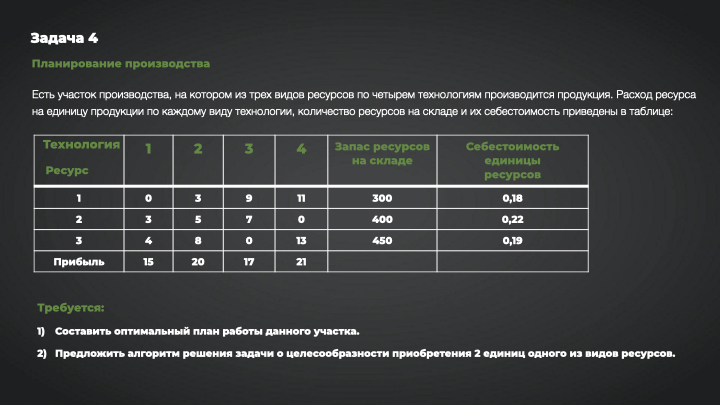

Максимизировать разницу между прибылью и себестоимостью

In [ ]:
cost = np.array([0.18, 0.22, 0.19])
profit = np.array([15, 20, 17, 21])
limitation = np.array([300, 400, 450])
resources = np.array([
                      [0, 3, 9, 11],
                      [3, 5, 7, 0],
                      [4, 8, 0, 13]
                     ])

In [ ]:
x = cvxpy.Variable(shape=4, integer=True)

In [ ]:
total_value = profit @ x

In [ ]:
constraints = [
               resources[0, :] @ x <= limitation[0],
               resources[1, :] @ x <= limitation[1],
               resources[2, :] @ x <= limitation[2],
               x >=0
              ]

In [ ]:
problem = cvxpy.Problem(cvxpy.Maximize(total_value), constraints=constraints)

In [ ]:
problem.solve()

1833.0

In [ ]:
x.value

array([112.,   0.,   9.,   0.])

In [ ]:
problem.constraints

[Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ()))]

In [ ]:
cost = np.array([0.18, 0.22, 0.19])
profit = np.array([15, 20, 17, 21])
limitation = np.array([300, 400, 450])
resources = np.array([
                      [0, 3, 9, 11],
                      [3, 5, 7, 0],
                      [4, 8, 0, 13]
                     ])

In [ ]:
y = cvxpy.Variable(shape=3)

In [ ]:
total_value = limitation @ y

In [ ]:
constraints = [
               resources[:, 0] @ y >= profit[0],
               resources[:, 1] @ y >= profit[1],
               resources[:, 2] @ y >= profit[2],
               resources[:, 3] @ y >= profit[2],
               y >=0
              ]

In [ ]:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=constraints)

In [ ]:
problem.solve()

1839.2857059076423

In [ ]:
y.value

array([-8.45442094e-09,  2.42857144e+00,  1.92857140e+00])

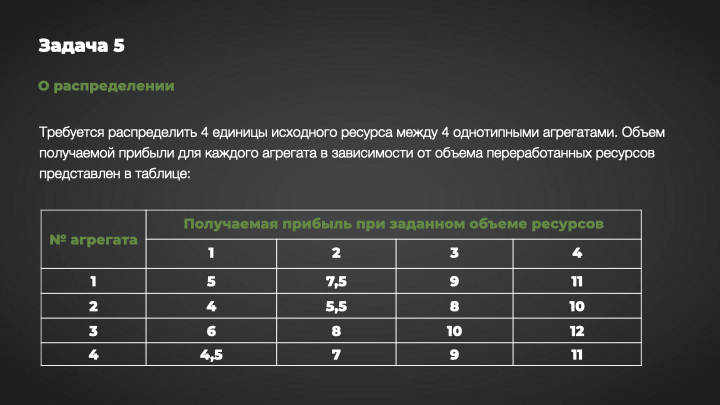

In [ ]:
profit = np.array([
                   [5, 7.5, 9, 11],
                   [4, 5.5, 8, 10],
                   [6, 8, 10, 12],
                   [4.5, 7, 9, 11]
])

machine = np.array([1, 2, 3, 4])
resource = np.array([1, 2, 3, 4])

In [ ]:
x = cvxpy.Variable(shape=profit.shape, boolean = True)

In [ ]:
total_value = cvxpy.sum(cvxpy.multiply(profit, x))

In [ ]:
constraints = [cvxpy.sum(x, axis=0)==np.ones(machine.shape),
               cvxpy.sum(x, axis=1)==np.ones(resource.shape),
               x>=0
              ]


In [ ]:
np.ones(machine.shape)

array([1., 1., 1., 1.])

In [ ]:
problem = cvxpy.Problem(cvxpy.Maximize(total_value), constraints=constraints)

In [ ]:
problem.solve()

32.5

In [ ]:
x.value.tolist()

[[0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0]]

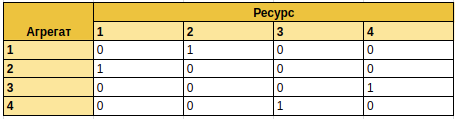

# Задача 5

In [ ]:
profit = np.array([
                   [5, 7.5, 9, 11],
                   [4, 5.5, 8, 10],
                   [6, 8, 10, 12],
                   [4.5, 7, 9, 11]
])

machine = np.array([1, 2, 3, 4])
resource = 4

$$F(x_{ij}) = \sum_{i=1}^{4}\sum_{j=1}^{4}a_{ij}*x_{ij} \to max$$

$$\sum_{j=1}^{4}x_{j} = 1$$
$$\sum_{i=1}^{4}\sum_{j=1}^{4}x_{ij}*b_{j,1} = 4$$
$$ i,j \in (1,4) $$

In [ ]:
x = cvxpy.Variable(shape=profit.shape, boolean = True)
total_value = cvxpy.sum(cvxpy.multiply(profit, x))

In [ ]:
constraints = [cvxpy.sum(x, axis=1)<=1,
               cvxpy.sum(x @ resource, axis=0)==4
              ]


In [ ]:
problem = cvxpy.Problem(cvxpy.Maximize(total_value), constraints=constraints)
problem.solve()

19.5

In [ ]:
x.value.tolist()

[[1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0]]

# РГЗ
## Вариант 29

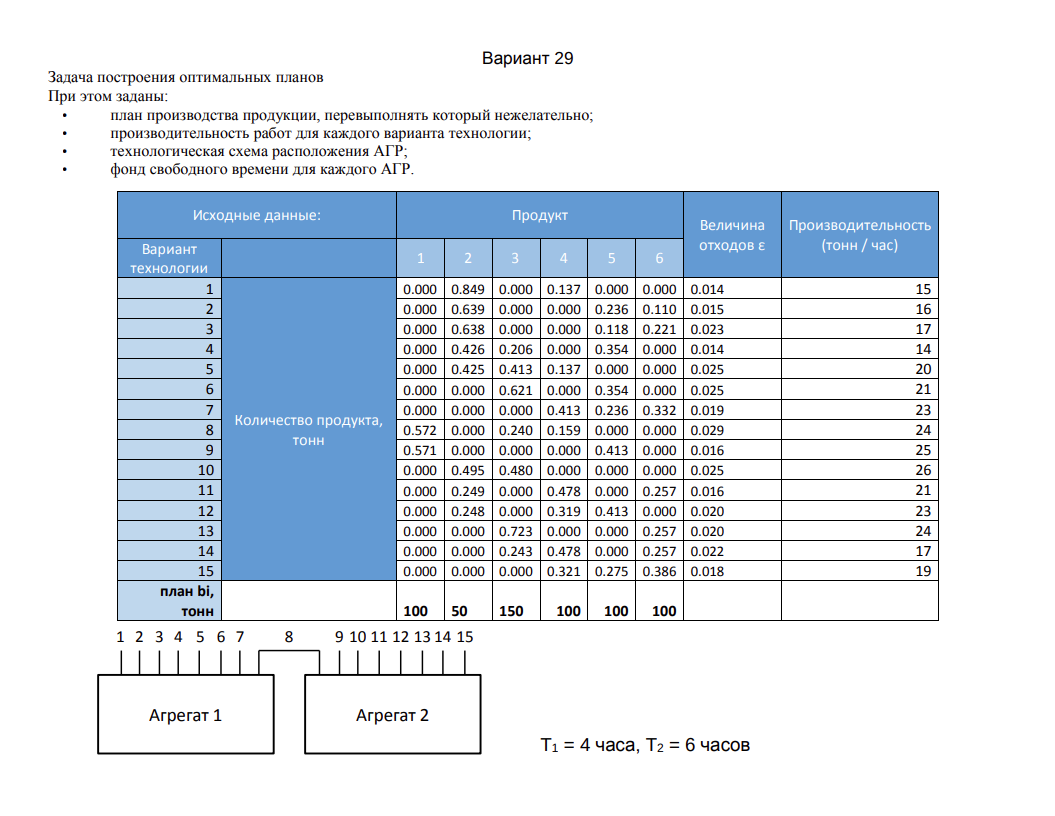

In [ ]:
def print_answer(x, waste, production_rate):
    print('Технология:\tВремя (ч):\tОтходы (т):')
    print('_'*60)
    for i in range(1, len(x.value)+1):
        print(i,round(x.value[i-1], 2),
              round(x.value[i-1]*waste[i-1]*production_rate[i-1], 3),
              sep='\t\t| ')
        print('_'*60)
    print("Время работы агрегата 1: {:.1f} часов".format(sum(x.value[0:8])))
    print("Время работы агрегата 2: {:.1f} часов".format(sum(x.value[8:])))
    print("Суммарное время работы агрегатов: {:.1f} часов".format(sum(x.value)))
    print("Величина отходов: {:.3f} тонн".format(x.value @ (waste * production_rate)))   

In [ ]:
# 1
production_rate = np.array([15, 16, 17, 14, 20, 21, 23,
                            24, 25, 26, 21, 23, 24, 17, 19])

plan = np.array([100, 50, 150, 100, 100, 100])

waste = np.array([0.014, 0.015, 0.023, 0.014, 0.025, 0.025, 0.019,
                  0.029, 0.016, 0.025, 0.016, 0.020, 0.020, 0.022, 0.018])

product = np.array([
                    [0., 0.849, 0., 0.137, 0., 0.],
                    [0., 0.639, 0., 0., 0.236, 0.11],
                    [0., 0.638, 0., 0., 0.118, 0.221],
                    [0., 0.426, 0.206, 0., 0.354, 0.],
                    [0., 0.425, 0.413, 0.137, 0., 0.],
                    [0., 0., 0.621, 0., 0.354, 0.],
                    [0., 0., 0., 0.413, 0.236, 0.332],
                    [0.572, 0., 0.240, 0.159, 0., 0.],
                    [0.571, 0., 0., 0., 0.413, 0.],
                    [0., 0.495, 0.480, 0., 0., 0.],
                    [0., 0.249, 0., 0.478, 0., 0.257],
                    [0., 0.248, 0., 0.319, 0.413, 0.],
                    [0., 0., 0.723, 0., 0., 0.257],
                    [0., 0., 0.243, 0.478, 0., 0.257],
                    [0., 0., 0., 0.321, 0.275, 0.386]
                 ])

x = cvxpy.Variable(shape = 15)
func = cvxpy.sum(x)
constraints = [
               product[:, 0] @ cvxpy.multiply(x,production_rate) == plan[0],
               product[:, 1] @ cvxpy.multiply(x,production_rate) == plan[1],
               product[:, 2] @ cvxpy.multiply(x,production_rate) == plan[2],
               product[:, 3] @ cvxpy.multiply(x,production_rate) == plan[3],
               product[:, 4] @ cvxpy.multiply(x,production_rate) == plan[4],
               product[:, 5] @ cvxpy.multiply(x,production_rate) == plan[5],
               cvxpy.sum(x[0:8]) <= 4,
               cvxpy.sum(x[7:]) <= 6,
               x>=0 
               ]
problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve()
if str(problem.solve())!='inf':
    print_answer(x, waste, production_rate)
else:
    print('Решений нет!')

Решений нет!


In [ ]:
# 2
production_rate = np.array([15, 16, 17, 14, 20, 21, 23,
                            24, 25, 26, 21, 23, 24, 17, 19])

plan = np.array([100, 50, 150, 100, 100, 100])

waste = np.array([0.014, 0.015, 0.023, 0.014, 0.025, 0.025, 0.019,
                  0.029, 0.016, 0.025, 0.016, 0.020, 0.020, 0.022, 0.018])

product = np.array([
                    [0., 0.849, 0., 0.137, 0., 0.],
                    [0., 0.639, 0., 0., 0.236, 0.11],
                    [0., 0.638, 0., 0., 0.118, 0.221],
                    [0., 0.426, 0.206, 0., 0.354, 0.],
                    [0., 0.425, 0.413, 0.137, 0., 0.],
                    [0., 0., 0.621, 0., 0.354, 0.],
                    [0., 0., 0., 0.413, 0.236, 0.332],
                    [0.572, 0., 0.240, 0.159, 0., 0.],
                    [0.571, 0., 0., 0., 0.413, 0.],
                    [0., 0.495, 0.480, 0., 0., 0.],
                    [0., 0.249, 0., 0.478, 0., 0.257],
                    [0., 0.248, 0., 0.319, 0.413, 0.],
                    [0., 0., 0.723, 0., 0., 0.257],
                    [0., 0., 0.243, 0.478, 0., 0.257],
                    [0., 0., 0., 0.321, 0.275, 0.386]
                 ])

x = cvxpy.Variable(shape = 15)
func = cvxpy.sum(x) 
constraints = [
               product[:, 0] @ cvxpy.multiply(x,production_rate) == plan[0],
               product[:, 1] @ cvxpy.multiply(x,production_rate) == plan[1],
               product[:, 2] @ cvxpy.multiply(x,production_rate) == plan[2],
               product[:, 3] @ cvxpy.multiply(x,production_rate) == plan[3],
               product[:, 4] @ cvxpy.multiply(x,production_rate) == plan[4],
               product[:, 5] @ cvxpy.multiply(x,production_rate) == plan[5],
               x>=0 
               ]
problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve()
if str(problem.solve())!='inf':
    print_answer(x, waste, production_rate)
else:
    print('Решений нет!')

Технология:	Время (ч):	Отходы (т):
____________________________________________________________
1		| 0.0		| 0.0
____________________________________________________________
2		| 0.0		| 0.0
____________________________________________________________
3		| 0.0		| 0.0
____________________________________________________________
4		| 0.0		| 0.0
____________________________________________________________
5		| 0.0		| 0.0
____________________________________________________________
6		| 0.0		| 0.0
____________________________________________________________
7		| 8.93		| 3.903
____________________________________________________________
8		| 2.72		| 1.893
____________________________________________________________
9		| 4.39		| 1.756
____________________________________________________________
10		| 3.6		| 2.337
____________________________________________________________
11		| 0.0		| 0.0
____________________________________________________________
12		| 0.65		| 0.3
__________________________

In [ ]:
# 3
production_rate = np.array([15, 16, 17, 14, 20, 21, 23,
                            24, 25, 26, 21, 23, 24, 17, 19])

plan = np.array([100, 50, 150, 100, 100, 100])

waste = np.array([0.014, 0.015, 0.023, 0.014, 0.025, 0.025, 0.019,
                  0.029, 0.016, 0.025, 0.016, 0.020, 0.020, 0.022, 0.018])

product = np.array([
                    [0., 0.849, 0., 0.137, 0., 0.],
                    [0., 0.639, 0., 0., 0.236, 0.11],
                    [0., 0.638, 0., 0., 0.118, 0.221],
                    [0., 0.426, 0.206, 0., 0.354, 0.],
                    [0., 0.425, 0.413, 0.137, 0., 0.],
                    [0., 0., 0.621, 0., 0.354, 0.],
                    [0., 0., 0., 0.413, 0.236, 0.332],
                    [0.572, 0., 0.240, 0.159, 0., 0.],
                    [0.571, 0., 0., 0., 0.413, 0.],
                    [0., 0.495, 0.480, 0., 0., 0.],
                    [0., 0.249, 0., 0.478, 0., 0.257],
                    [0., 0.248, 0., 0.319, 0.413, 0.],
                    [0., 0., 0.723, 0., 0., 0.257],
                    [0., 0., 0.243, 0.478, 0., 0.257],
                    [0., 0., 0., 0.321, 0.275, 0.386]
                 ])

x = cvxpy.Variable(shape = 15)
func = x @ (waste * production_rate)
constraints = [
               product[:, 0] @ cvxpy.multiply(x,production_rate) == plan[0],
               product[:, 1] @ cvxpy.multiply(x,production_rate) == plan[1],
               product[:, 2] @ cvxpy.multiply(x,production_rate) == plan[2],
               product[:, 3] @ cvxpy.multiply(x,production_rate) == plan[3],
               product[:, 4] @ cvxpy.multiply(x,production_rate) == plan[4],
               product[:, 5] @ cvxpy.multiply(x,production_rate) == plan[5],
               cvxpy.sum(x[:8]) <= 4*4,
               cvxpy.sum(x[8:]) <= 6*4,
               x>=0 
               ]
problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve()
if str(problem.solve())!='inf':
    print_answer(x, waste, production_rate)
else:
    print('Решений нет!')

Технология:	Время (ч):	Отходы (т):
____________________________________________________________
1		| 0.0		| 0.0
____________________________________________________________
2		| 0.0		| 0.0
____________________________________________________________
3		| 0.0		| 0.0
____________________________________________________________
4		| 4.02		| 0.787
____________________________________________________________
5		| 0.0		| 0.0
____________________________________________________________
6		| 0.0		| 0.0
____________________________________________________________
7		| 1.43		| 0.625
____________________________________________________________
8		| 0.0		| 0.0
____________________________________________________________
9		| 7.01		| 2.802
____________________________________________________________
10		| 0.0		| 0.0
____________________________________________________________
11		| 4.98		| 1.673
____________________________________________________________
12		| 0.0		| 0.0
__________________________

In [ ]:
# 4
production_rate = np.array([15, 16, 17, 14, 20, 21, 23,
                            24, 25, 26, 21, 23, 24, 17, 19])

plan = np.array([100, 50, 150, 100, 100, 100])

waste = np.array([0.014, 0.015, 0.023, 0.014, 0.025, 0.025, 0.019,
                  0.029, 0.016, 0.025, 0.016, 0.020, 0.020, 0.022, 0.018])

product = np.array([
                    [0., 0.849, 0., 0.137, 0., 0.],
                    [0., 0.639, 0., 0., 0.236, 0.11],
                    [0., 0.638, 0., 0., 0.118, 0.221],
                    [0., 0.426, 0.206, 0., 0.354, 0.],
                    [0., 0.425, 0.413, 0.137, 0., 0.],
                    [0., 0., 0.621, 0., 0.354, 0.],
                    [0., 0., 0., 0.413, 0.236, 0.332],
                    [0.572, 0., 0.240, 0.159, 0., 0.],
                    [0.571, 0., 0., 0., 0.413, 0.],
                    [0., 0.495, 0.480, 0., 0., 0.],
                    [0., 0.249, 0., 0.478, 0., 0.257],
                    [0., 0.248, 0., 0.319, 0.413, 0.],
                    [0., 0., 0.723, 0., 0., 0.257],
                    [0., 0., 0.243, 0.478, 0., 0.257],
                    [0., 0., 0., 0.321, 0.275, 0.386]
                 ])
const = 0.02
x = cvxpy.Variable(shape = 15)
func = x @ (waste * production_rate)
constraints = [
               product[:, 0] @ cvxpy.multiply(x,production_rate) == plan[0],
               product[:, 1] @ cvxpy.multiply(x,production_rate) == plan[1],
               product[:, 2] @ cvxpy.multiply(x,production_rate) == plan[2],
               product[:, 3] @ cvxpy.multiply(x,production_rate) == plan[3],
               product[:, 4] @ cvxpy.multiply(x,production_rate) == plan[4],
               product[:, 5] @ cvxpy.multiply(x,production_rate) == plan[5],
               x>=0 
               ]
problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve()
if str(problem.solve())!='inf':
    print_answer(x, waste, production_rate)
else:
    print('Решений нет!')

Технология:	Время (ч):	Отходы (т):
____________________________________________________________
1		| 0.0		| 0.0
____________________________________________________________
2		| 0.0		| 0.0
____________________________________________________________
3		| 0.0		| 0.0
____________________________________________________________
4		| 4.02		| 0.787
____________________________________________________________
5		| 0.0		| 0.0
____________________________________________________________
6		| 0.0		| 0.0
____________________________________________________________
7		| 1.43		| 0.625
____________________________________________________________
8		| 0.0		| 0.0
____________________________________________________________
9		| 7.01		| 2.802
____________________________________________________________
10		| 0.0		| 0.0
____________________________________________________________
11		| 4.98		| 1.673
____________________________________________________________
12		| 0.0		| 0.0
__________________________

In [ ]:
# 5
production_rate = np.array([15, 16, 17, 14, 20, 21, 23,
                            24, 25, 26, 21, 23, 24, 17, 19])

plan = np.array([100, 50, 150, 100, 100, 100])

waste = np.array([0.014, 0.015, 0.023, 0.014, 0.025, 0.025, 0.019,
                  0.029, 0.016, 0.025, 0.016, 0.020, 0.020, 0.022, 0.018])

product = np.array([
                    [0., 0.849, 0., 0.137, 0., 0.],
                    [0., 0.639, 0., 0., 0.236, 0.11],
                    [0., 0.638, 0., 0., 0.118, 0.221],
                    [0., 0.426, 0.206, 0., 0.354, 0.],
                    [0., 0.425, 0.413, 0.137, 0., 0.],
                    [0., 0., 0.621, 0., 0.354, 0.],
                    [0., 0., 0., 0.413, 0.236, 0.332],
                    [0.572, 0., 0.240, 0.159, 0., 0.],
                    [0.571, 0., 0., 0., 0.413, 0.],
                    [0., 0.495, 0.480, 0., 0., 0.],
                    [0., 0.249, 0., 0.478, 0., 0.257],
                    [0., 0.248, 0., 0.319, 0.413, 0.],
                    [0., 0., 0.723, 0., 0., 0.257],
                    [0., 0., 0.243, 0.478, 0., 0.257],
                    [0., 0., 0., 0.321, 0.275, 0.386]
                 ])

x = cvxpy.Variable(shape = 15)
func = cvxpy.sum(x) 
constraints = [
               product[:, 0] @ cvxpy.multiply(x,production_rate) == plan[0],
               product[:, 1] @ cvxpy.multiply(x,production_rate) == plan[1],
               product[:, 2] @ cvxpy.multiply(x,production_rate) == plan[2],
               product[:, 3] @ cvxpy.multiply(x,production_rate) == plan[3],
               product[:, 4] @ cvxpy.multiply(x,production_rate) == plan[4],
               product[:, 5] @ cvxpy.multiply(x,production_rate) == plan[5],
               cvxpy.sum(cvxpy.multiply(x, cvxpy.multiply(waste, production_rate))) <= 11.5,
               cvxpy.sum(x[:8]) <= 4*4,
               cvxpy.sum(x[8:]) <= 6*4,
               x>=0 
               ]
problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve()
if str(problem.solve())!='inf':
    print_answer(x, waste, production_rate)
else:
    print('Решений нет!')

Технология:	Время (ч):	Отходы (т):
____________________________________________________________
1		| 0.0		| 0.0
____________________________________________________________
2		| 0.0		| 0.0
____________________________________________________________
3		| 0.0		| 0.0
____________________________________________________________
4		| 0.0		| 0.0
____________________________________________________________
5		| 0.0		| 0.0
____________________________________________________________
6		| 0.0		| 0.0
____________________________________________________________
7		| 3.67		| 1.602
____________________________________________________________
8		| 0.99		| 0.687
____________________________________________________________
9		| 6.06		| 2.422
____________________________________________________________
10		| 1.13		| 0.734
____________________________________________________________
11		| 4.76		| 1.601
____________________________________________________________
12		| 1.85		| 0.851
____________________

In [ ]:
# 6
production_rate = np.array([15, 16, 17, 14, 20, 21, 23,
                            24, 25, 26, 21, 23, 24, 17, 19])

plan = np.array([100, 50, 150, 100, 100, 100])

waste = np.array([0.014, 0.015, 0.023, 0.014, 0.025, 0.025, 0.019,
                  0.029, 0.016, 0.025, 0.016, 0.020, 0.020, 0.022, 0.018])

product = np.array([
                    [0., 0.849, 0., 0.137, 0., 0.],
                    [0., 0.639, 0., 0., 0.236, 0.11],
                    [0., 0.638, 0., 0., 0.118, 0.221],
                    [0., 0.426, 0.206, 0., 0.354, 0.],
                    [0., 0.425, 0.413, 0.137, 0., 0.],
                    [0., 0., 0.621, 0., 0.354, 0.],
                    [0., 0., 0., 0.413, 0.236, 0.332],
                    [0.572, 0., 0.240, 0.159, 0., 0.],
                    [0.571, 0., 0., 0., 0.413, 0.],
                    [0., 0.495, 0.480, 0., 0., 0.],
                    [0., 0.249, 0., 0.478, 0., 0.257],
                    [0., 0.248, 0., 0.319, 0.413, 0.],
                    [0., 0., 0.723, 0., 0., 0.257],
                    [0., 0., 0.243, 0.478, 0., 0.257],
                    [0., 0., 0., 0.321, 0.275, 0.386]
                 ])

x = cvxpy.Variable(shape = 15)
func = cvxpy.sum(x) 
constraints = [
               product[:, 0] @ cvxpy.multiply(x,production_rate) == plan[0],
               product[:, 1] @ cvxpy.multiply(x,production_rate) == plan[1],
               product[:, 2] @ cvxpy.multiply(x,production_rate) == plan[2],
               product[:, 3] @ cvxpy.multiply(x,production_rate) == plan[3],
               product[:, 4] @ cvxpy.multiply(x,production_rate) == plan[4],
               product[:, 5] @ cvxpy.multiply(x,production_rate) == plan[5],
               cvxpy.sum(cvxpy.multiply(x, cvxpy.multiply(waste, production_rate))) <= 11.5,
               cvxpy.sum(x[:8]) <= 4,
               cvxpy.sum(x[8:]) <= 6*4,
               x>=0 
               ]
problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve()
if str(problem.solve())!='inf':
    print_answer(x, waste, production_rate)
else:
    print('Решений нет!')

Технология:	Время (ч):	Отходы (т):
____________________________________________________________
1		| 0.0		| 0.0
____________________________________________________________
2		| 0.0		| 0.0
____________________________________________________________
3		| 0.0		| 0.0
____________________________________________________________
4		| 0.0		| 0.0
____________________________________________________________
5		| 0.0		| 0.0
____________________________________________________________
6		| 0.0		| 0.0
____________________________________________________________
7		| 3.17		| 1.387
____________________________________________________________
8		| 0.83		| 0.575
____________________________________________________________
9		| 6.21		| 2.484
____________________________________________________________
10		| 0.9		| 0.584
____________________________________________________________
11		| 5.21		| 1.751
____________________________________________________________
12		| 1.96		| 0.903
_____________________

In [ ]:
# 7
production_rate = np.array([15, 16, 17, 14, 20, 21, 23,
                            24, 25, 26, 21, 23, 24, 17, 19])

plan = np.array([100, 50, 150, 100, 100, 100])

waste = np.array([0.014, 0.015, 0.023, 0.014, 0.025, 0.025, 0.019,
                  0.029, 0.016, 0.025, 0.016, 0.020, 0.020, 0.022, 0.018])

product = np.array([
                    [0., 0.849, 0., 0.137, 0., 0.],
                    [0., 0.639, 0., 0., 0.236, 0.11],
                    [0., 0.638, 0., 0., 0.118, 0.221],
                    [0., 0.426, 0.206, 0., 0.354, 0.],
                    [0., 0.425, 0.413, 0.137, 0., 0.],
                    [0., 0., 0.621, 0., 0.354, 0.],
                    [0., 0., 0., 0.413, 0.236, 0.332],
                    [0.572, 0., 0.240, 0.159, 0., 0.],
                    [0.571, 0., 0., 0., 0.413, 0.],
                    [0., 0.495, 0.480, 0., 0., 0.],
                    [0., 0.249, 0., 0.478, 0., 0.257],
                    [0., 0.248, 0., 0.319, 0.413, 0.],
                    [0., 0., 0.723, 0., 0., 0.257],
                    [0., 0., 0.243, 0.478, 0., 0.257],
                    [0., 0., 0., 0.321, 0.275, 0.386]
                 ])

x = cvxpy.Variable(shape = 15)
func = cvxpy.sum(x) 
const= 0.02
constraints = [
               cvxpy.abs(product[:, 0] @ cvxpy.multiply(x,production_rate) -plan[0])<= const*plan[0],
               cvxpy.abs(product[:, 1] @ cvxpy.multiply(x,production_rate) -plan[1])<= const*plan[1],
               cvxpy.abs(product[:, 2] @ cvxpy.multiply(x,production_rate) -plan[2])<= const*plan[2],
               cvxpy.abs(product[:, 3] @ cvxpy.multiply(x,production_rate) -plan[3])<= const*plan[3],
               cvxpy.abs(product[:, 4] @ cvxpy.multiply(x,production_rate) -plan[4])<= const*plan[4],
               cvxpy.abs(product[:, 5] @ cvxpy.multiply(x,production_rate) -plan[5])<= const*plan[5],
               cvxpy.sum(cvxpy.multiply(x, cvxpy.multiply(waste, production_rate))) <= 11.5,
               cvxpy.sum(x[:8]) <= 4,
               cvxpy.sum(x[8:]) <= 6*4,
               x>=0 
               ]
problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve()
if str(problem.solve())!='inf':
    print_answer(x, waste, production_rate)
else:
    print('Решений нет!')

Технология:	Время (ч):	Отходы (т):
____________________________________________________________
1		| 0.0		| 0.0
____________________________________________________________
2		| 0.0		| 0.0
____________________________________________________________
3		| 0.0		| 0.0
____________________________________________________________
4		| 0.0		| 0.0
____________________________________________________________
5		| 0.0		| 0.0
____________________________________________________________
6		| 0.0		| 0.0
____________________________________________________________
7		| 3.17		| 1.386
____________________________________________________________
8		| 0.83		| 0.577
____________________________________________________________
9		| 6.07		| 2.427
____________________________________________________________
10		| 0.91		| 0.591
____________________________________________________________
11		| 5.05		| 1.697
____________________________________________________________
12		| 1.91		| 0.878
____________________

In [ ]:
# 6
production_rate = np.array([15, 16, 17, 14, 20, 21, 23,
                            24, 25, 26, 21, 23, 24, 17, 19])

plan = np.array([100, 50, 150, 100, 100, 100])

waste = np.array([0.014, 0.015, 0.023, 0.014, 0.025, 0.025, 0.019,
                  0.029, 0.016, 0.025, 0.016, 0.020, 0.020, 0.022, 0.018])

product = np.array([
                    [0., 0.849, 0., 0.137, 0., 0.],
                    [0., 0.639, 0., 0., 0.236, 0.11],
                    [0., 0.638, 0., 0., 0.118, 0.221],
                    [0., 0.426, 0.206, 0., 0.354, 0.],
                    [0., 0.425, 0.413, 0.137, 0., 0.],
                    [0., 0., 0.621, 0., 0.354, 0.],
                    [0., 0., 0., 0.413, 0.236, 0.332],
                    [0.572, 0., 0.240, 0.159, 0., 0.],
                    [0.571, 0., 0., 0., 0.413, 0.],
                    [0., 0.495, 0.480, 0., 0., 0.],
                    [0., 0.249, 0., 0.478, 0., 0.257],
                    [0., 0.248, 0., 0.319, 0.413, 0.],
                    [0., 0., 0.723, 0., 0., 0.257],
                    [0., 0., 0.243, 0.478, 0., 0.257],
                    [0., 0., 0., 0.321, 0.275, 0.386]
                 ])

x = cvxpy.Variable(shape = 15)
func = cvxpy.sum(x) 
constraints = [
               product[:, 0] @ cvxpy.multiply(x,production_rate) == plan[0],
               product[:, 1] @ cvxpy.multiply(x,production_rate) == plan[1],
               product[:, 2] @ cvxpy.multiply(x,production_rate) == plan[2],
               product[:, 3] @ cvxpy.multiply(x,production_rate) == plan[3],
               product[:, 4] @ cvxpy.multiply(x,production_rate) == plan[4],
               product[:, 5] @ cvxpy.multiply(x,production_rate) == plan[5],
               cvxpy.sum(cvxpy.multiply(x, cvxpy.multiply(waste, production_rate))) <= 11.5,
               cvxpy.sum(x[:8]) <= 4*4,
               cvxpy.sum(x[8:]) <= 6*4,
               x>=0 
               ]
problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve()
if str(problem.solve())!='inf':
    print_answer(x, waste, production_rate)
else:
    print('Решений нет!')

Технология:	Время (ч):	Отходы (т):
____________________________________________________________
1		| 0.0		| 0.0
____________________________________________________________
2		| 0.0		| 0.0
____________________________________________________________
3		| 0.0		| 0.0
____________________________________________________________
4		| 0.0		| 0.0
____________________________________________________________
5		| 0.0		| 0.0
____________________________________________________________
6		| 0.0		| 0.0
____________________________________________________________
7		| 3.67		| 1.602
____________________________________________________________
8		| 0.99		| 0.687
____________________________________________________________
9		| 6.06		| 2.422
____________________________________________________________
10		| 1.13		| 0.734
____________________________________________________________
11		| 4.76		| 1.601
____________________________________________________________
12		| 1.85		| 0.851
____________________

In [ ]:
# 4
production_rate = np.array([15, 16, 17, 14, 20, 21, 23,
                            24, 25, 26, 21, 23, 24, 17, 19])

plan = np.array([100, 50, 150, 100, 100, 100])

waste = np.array([0.014, 0.015, 0.023, 0.014, 0.025, 0.025, 0.019,
                  0.029, 0.016, 0.025, 0.016, 0.020, 0.020, 0.022, 0.018])

product = np.array([
                    [0., 0.849, 0., 0.137, 0., 0.],
                    [0., 0.639, 0., 0., 0.236, 0.11],
                    [0., 0.638, 0., 0., 0.118, 0.221],
                    [0., 0.426, 0.206, 0., 0.354, 0.],
                    [0., 0.425, 0.413, 0.137, 0., 0.],
                    [0., 0., 0.621, 0., 0.354, 0.],
                    [0., 0., 0., 0.413, 0.236, 0.332],
                    [0.572, 0., 0.240, 0.159, 0., 0.],
                    [0.571, 0., 0., 0., 0.413, 0.],
                    [0., 0.495, 0.480, 0., 0., 0.],
                    [0., 0.249, 0., 0.478, 0., 0.257],
                    [0., 0.248, 0., 0.319, 0.413, 0.],
                    [0., 0., 0.723, 0., 0., 0.257],
                    [0., 0., 0.243, 0.478, 0., 0.257],
                    [0., 0., 0., 0.321, 0.275, 0.386]
                 ])
const = 0.02
x = cvxpy.Variable(shape = 15)
func = x @ (waste * production_rate)
constraints = [
               product[:, 0] @ cvxpy.multiply(x,production_rate) == plan[0],
               product[:, 1] @ cvxpy.multiply(x,production_rate) == plan[1],
               product[:, 2] @ cvxpy.multiply(x,production_rate) == plan[2],
               product[:, 3] @ cvxpy.multiply(x,production_rate) == plan[3],
               product[:, 4] @ cvxpy.multiply(x,production_rate) == plan[4],
               product[:, 5] @ cvxpy.multiply(x,production_rate) == plan[5],
               cvxpy.sum(x[:8]) <= 4*3,
               cvxpy.sum(x[8:]) <= 6*3,
               x>=0 
               ]
problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve()
if str(problem.solve())!='inf':
    print_answer(x, waste, production_rate)
else:
    print('Решений нет!')

Технология:	Время (ч):	Отходы (т):
____________________________________________________________
1		| 0.0		| 0.0
____________________________________________________________
2		| 0.0		| 0.0
____________________________________________________________
3		| 0.0		| 0.0
____________________________________________________________
4		| 3.13		| 0.613
____________________________________________________________
5		| 0.0		| 0.0
____________________________________________________________
6		| 1.29		| 0.675
____________________________________________________________
7		| 3.53		| 1.541
____________________________________________________________
8		| 1.67		| 1.16
____________________________________________________________
9		| 5.4		| 2.161
____________________________________________________________
10		| 0.0		| 0.0
____________________________________________________________
11		| 5.99		| 2.013
____________________________________________________________
12		| 0.0		| 0.0
______________________